In [1]:
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import ast

In [11]:
def df_and_graph(file_name):
    df = pkl.load(open(f"{file_name}/test_set_results.pkl", 'rb'))
    
    test_rows = df.loc[df["set"] == "test"]
    training_rows = df.loc[df["set"] == "training"]

    fig, ax = plt.subplots()

    training_rows.plot.scatter("tddft_energy", "xtb_energy", marker='x', color='red', ax=ax)
    test_rows.plot.scatter("tddft_energy", "xtb_energy", marker='x', color='black', ax=ax)

    fig.set_size_inches(12, 12)
    plt.show()
    
    return df

## Errors and correlations

In [3]:
directories = os.walk(".")
dirs = [i[0] for i in directories]
#dirs = [x for x in dirs if re.match(r'^.\/[a-z]+', x)]
dirs

['.',
 './huckel_electronegativity_global_pair_response',
 './huckel_electronegativity_response',
 './huckel_electronegativity_kinetic_response',
 './response',
 './huckel_kinetic',
 './global_pair_response',
 './huckel_global_pair',
 './kinetic_global_pair',
 './huckel_global_pair_response',
 './electronegativity_global_pair_response',
 './huckel',
 './electronegativity_global_pair',
 './huckel_electronegativity_kinetic',
 './electronegativity_kinetic_global_pair_response',
 './huckel_electronegativity_kinetic_global_pair_response',
 './global_pair',
 './kinetic_response',
 './huckel_kinetic_global_pair_response',
 './huckel_electronegativity_global_pair',
 './kinetic',
 './.ipynb_checkpoints',
 './huckel_kinetic_global_pair',
 './huckel_electronegativity',
 './huckel_kinetic_response',
 './huckel_electronegativity_kinetic_global_pair',
 './electronegativity_kinetic_response',
 './electronegativity_kinetic_global_pair',
 './huckel_response',
 './kinetic_global_pair_response',
 './elec

In [4]:
directories = os.walk(".")

files = [i[2] for i in directories]

rerun_pile = []
output_files = []
test_result_files = []


for enum, f in enumerate(files):
    if re.search(r'^./[a-z]+', dirs[enum]) is None:
        continue
    output_file = [x for x in f if re.search(r'\d+$', x) is not None]
    df_file = [x for x in f if re.search(r'test_set_results.pkl', x) is not None]
    
    if(len(df_file) == 0):
        print(f"no test results file for {dirs[enum]}")
        rerun_pile.append(dirs[enum])
        continue
    
    output_files.append(dirs[enum] +"/" + output_file[0])
    test_result_files.append(df_file[0])

In [5]:
training = { 
    "no_params" : [],
    "RMSE_energies" : [],
    "R2_energies" : [],
    "R2_dipoles" : []
}

testing = { 
    "no_params" : [],
    "RMSE_energies" : [],
    "R2_energies" : [],
    "R2_dipoles" : []
}

overfitting_results = {}

for file in output_files:
    lines = list(open(file).readlines())
    
    parameters = [x for x in lines if "optimized parameters:" in x]
    parameters = parameters[0]
    parameters = parameters.replace("optimized parameters:  ", "")
    parameters = parameters.replace("\n", "")
    parameters = ast.literal_eval(parameters)
    #print(parameters)
    
    training["no_params"].append(len(list(parameters.keys())))
    testing["no_params"].append(len(list(parameters.keys())))
    
    training_set_results = lines[-9]
    test_set_results = lines[-6]
    
    #print(training_set_results, end="")
    #print(test_set_results, end="")
    
    training_set_values = re.findall(r'-?\d+.\d+', training_set_results)
    test_set_values = re.findall(r'-?\d+.\d+', test_set_results)
    
    #print(training_set_values)
    #print(test_set_values)
    
    training["RMSE_energies"].append(float(training_set_values[0]))
    training["R2_energies"].append(float(training_set_values[1]))
    training["R2_dipoles"].append(float(training_set_values[2]))
    
    testing["RMSE_energies"].append(float(test_set_values[0]))
    testing["R2_energies"].append(float(test_set_values[1]))
    testing["R2_dipoles"].append(float(test_set_values[2]))
        
    overfitting_results[file.split("/")[1]] = {
        "no. params" : len(list(parameters.keys())),
        "parameters" : list(parameters.keys()),
        "RMSE energy (training)" : float(training_set_values[0]),
        "R2 energy (training)" : float(training_set_values[1]),
        "R2 dipole (training)" : float(training_set_values[2]),
        "obj. func. (training)" : float(training_set_values[0]) + (1-float(training_set_values[1])) + (1-float(training_set_values[2])),
        "RMSE energy (testing)" : float(test_set_values[0]),
        "R2 energy (testing)" : float(test_set_values[1]),
        "R2 dipole (testing)" : float(test_set_values[2]),
        "obj. func. (testing)" : float(test_set_values[0]) + (1-float(test_set_values[1])) + (1-float(test_set_values[2]))
    }
    
overfitting_df = pd.DataFrame.from_dict(overfitting_results, orient='index')
overfitting_df = overfitting_df.sort_values("R2 energy (testing)", ascending=False)
#overfitting_df = overfitting_df.sort_values("R2 dipole (testing)", ascending=False)

overfitting_df

,no. params,parameters,RMSE energy (training),R2 energy (training),R2 dipole (training),obj. func. (training),RMSE energy (testing),R2 energy (testing),R2 dipole (testing),obj. func. (testing)
huckel_response,6,"[k_s, k_p, k_d, a_x, y_J, y_K]",0.020,0.725,0.141,1.154,0.021,0.699,0.184,1.138
huckel_global_pair_response,11,"[k_s, k_p, k_d, Mg_s, Mg_p, Mg_d, N_s, N_p, a_...",0.020,0.726,0.188,1.106,0.022,0.696,0.193,1.133
huckel_kinetic_global_pair_response,12,"[k_s, k_p, k_d, k_T, Mg_s, Mg_p, Mg_d, N_s, N_...",0.023,0.748,0.172,1.103,0.026,0.672,0.169,1.185
electronegativity_kinetic_response,7,"[k_EN_s, k_EN_p, k_EN_d, k_T, a_x, y_J, y_K]",0.021,0.684,0.210,1.127,0.024,0.652,0.187,1.185
huckel_electronegativity_response,9,"[k_s, k_p, k_d, k_EN_s, k_EN_p, k_EN_d, a_x, y...",0.020,0.721,0.184,1.115,0.024,0.646,0.188,1.190
huckel_electronegativity_kinetic_response,10,"[k_s, k_p, k_d, k_EN_s, k_EN_p, k_EN_d, k_T, a...",0.025,0.690,0.185,1.150,0.029,0.618,0.202,1.209
kinetic_response,4,"[k_T, a_x, y_J, y_K]",0.027,0.601,0.140,1.286,0.026,0.609,0.161,1.256
huckel_electronegativity_kinetic_global_pair_response,15,"[k_s, k_p, k_d, k_EN_s, k_EN_p, k_EN_d, k_T, M...",0.034,0.725,0.194,1.115,0.039,0.592,0.189,1.258
huckel_electronegativity_global_pair_response,14,"[k_s, k_p, k_d, k_EN_s, k_EN_p, k_EN_d, Mg_s, ...",0.035,0.718,0.167,1.150,0.044,0.489,0.157,1.398
response,3,"[a_x, y_J, y_K]",0.026,0.515,0.164,1.347,0.027,0.489,0.200,1.338


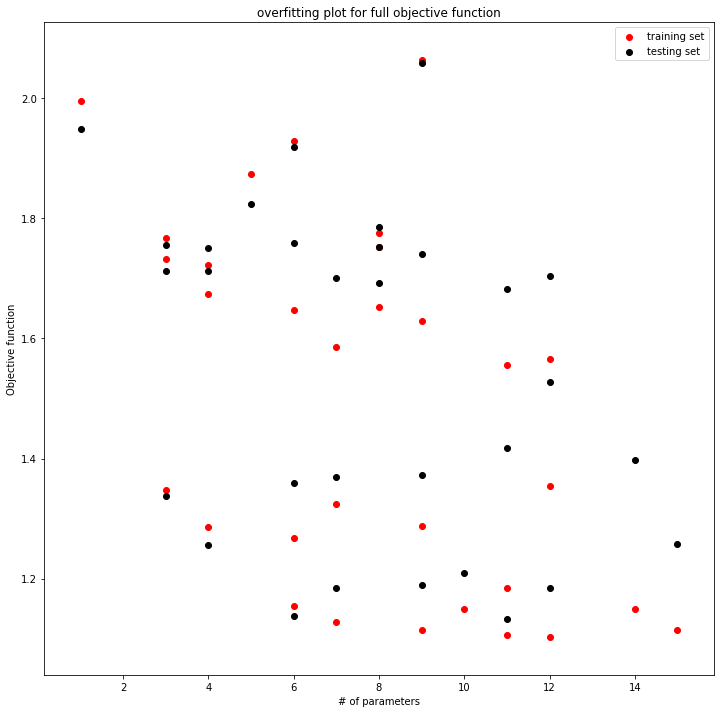

In [6]:
fig, ax = plt.subplots()

training_objective_function = np.array(training["RMSE_energies"]) + (1-np.array(training["R2_energies"])) + (1-np.array(training["R2_dipoles"]))
testing_objective_function = np.array(testing["RMSE_energies"]) + (1-np.array(testing["R2_energies"])) + (1-np.array(testing["R2_dipoles"]))

ax.scatter(training["no_params"], training_objective_function, color='red', label="training set")
ax.scatter(testing["no_params"], testing_objective_function, color='black', label="testing set")

ax.set_xlabel("# of parameters")
ax.set_ylabel("Objective function")
ax.set_title("overfitting plot for full objective function")
ax.legend()
fig.set_size_inches(12,12)

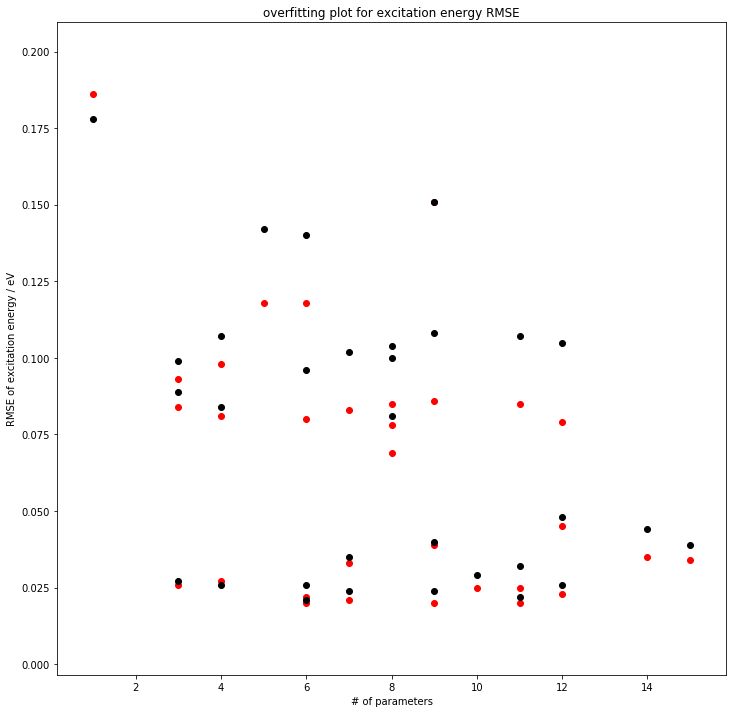

In [7]:
fig, ax = plt.subplots()

ax.scatter(training["no_params"], training["RMSE_energies"], color='red')
ax.scatter(testing["no_params"], testing["RMSE_energies"], color='black')

ax.set_xlabel("# of parameters")
ax.set_ylabel("RMSE of excitation energy / eV")
ax.set_title("overfitting plot for excitation energy RMSE")
fig.set_size_inches(12,12)


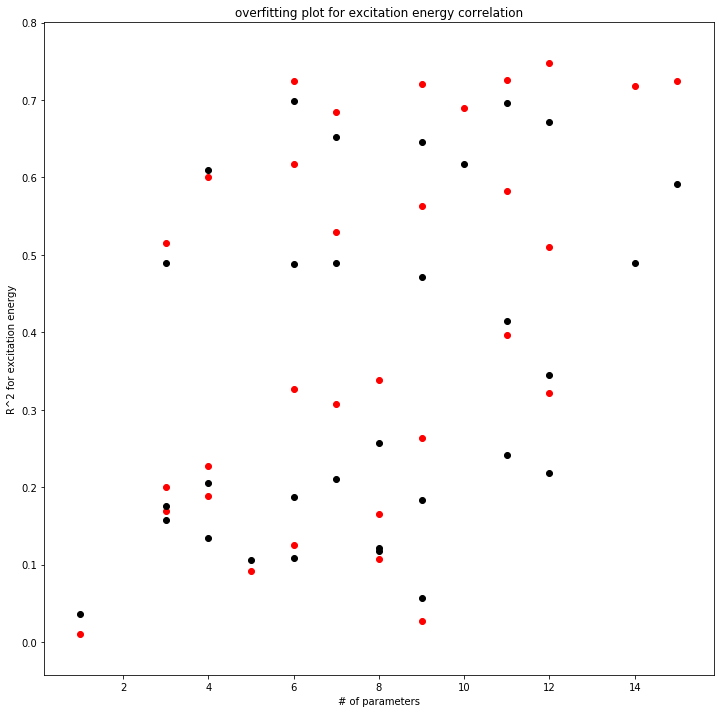

In [8]:
fig, ax = plt.subplots()

ax.scatter(training["no_params"], training["R2_energies"], color='red')
ax.scatter(testing["no_params"], testing["R2_energies"], color='black')

ax.set_xlabel("# of parameters")
ax.set_ylabel("R^2 for excitation energy")
ax.set_title("overfitting plot for excitation energy correlation")

fig.set_size_inches(12,12)


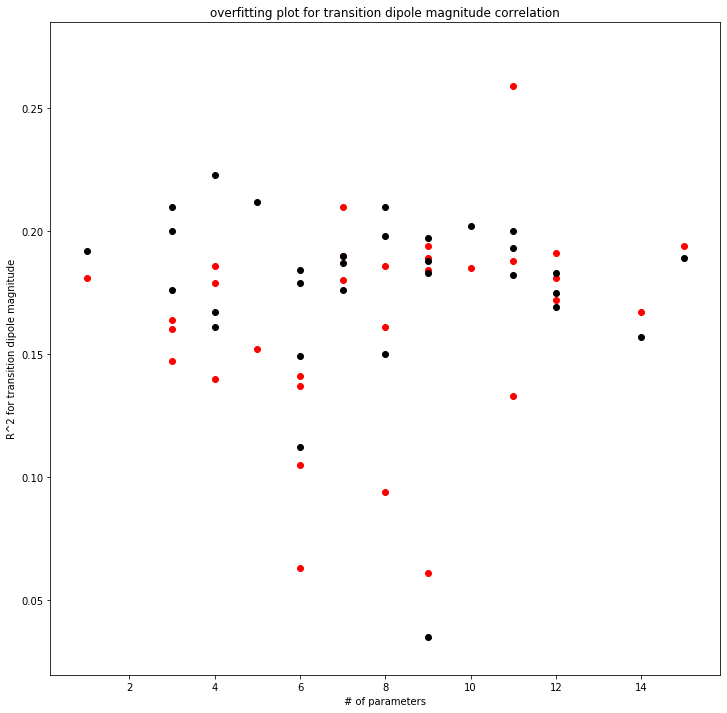

In [9]:
fig, ax = plt.subplots()

ax.scatter(training["no_params"], training["R2_dipoles"], color='red')
ax.scatter(testing["no_params"], testing["R2_dipoles"], color='black')

ax.set_xlabel("# of parameters")
ax.set_ylabel("R^2 for transition dipole magnitude")
ax.set_title("overfitting plot for transition dipole magnitude correlation")

fig.set_size_inches(12,12)


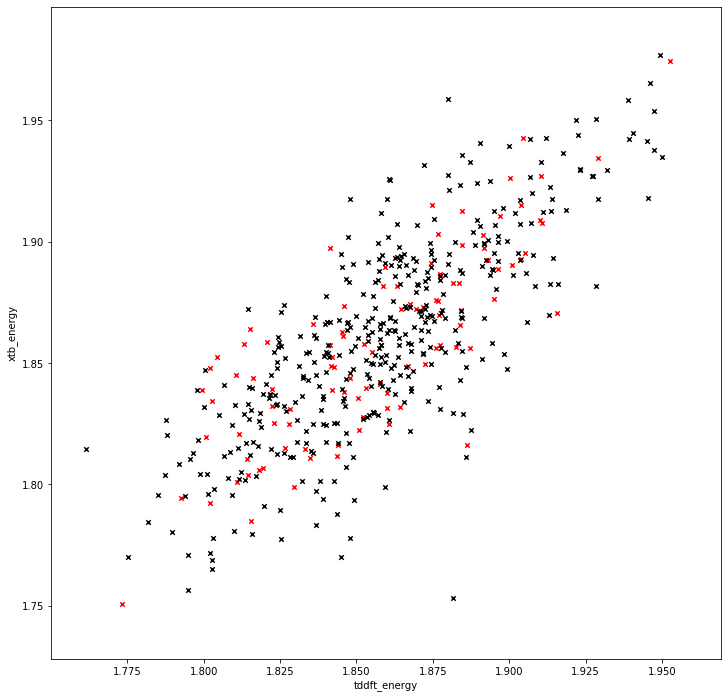

In [12]:
huckel_global_pair_response_df = df_and_graph("huckel_global_pair_response")

In [13]:
huckel_global_pair_response_df

,chromophores,set,tddft_energy,xtb_energy,energy_error,Z_values,tddft_dipoles,xtb_dipoles,dipole_errors,Na_Nc,tddft_angle_errors,xtb_angle_errors
0,step_1001_chromophore_1,test,1.912907,1.869743,-0.043164,-1.754885,"[-0.34950403, 2.653887491, -0.477898847]","[0.5507775019005401, -4.328741224657621, 0.506...",1.687154,"[-0.29400000000000004, 4.065999999999999, -0.3...",6.754632,3.906669
1,step_1001_chromophore_12,test,1.800987,1.804352,0.003366,0.055968,"[-2.287369813, -1.499455904, 0.193644764]","[3.71200565647569, 2.312319531400491, -0.15895...",1.640591,"[3.653000000000006, 1.8580000000000005, -0.551...",7.226140,7.460206
2,step_1001_chromophore_13,test,1.945561,1.917930,-0.027631,-1.150375,"[-0.754756204, -2.53537159, -0.019176462]","[1.296648660038035, 4.283366774062492, -0.2437...",1.848858,"[-1.131999999999998, -3.8919999999999995, -0.3...",4.212450,7.755319
3,step_1001_chromophore_15,test,1.872008,1.931468,0.059459,2.239062,"[-0.54968506, -2.608078035, -0.050338471]","[-0.9066586260258689, -4.329657623687989, -0.1...",1.763182,"[1.036999999999999, 4.018999999999998, -0.1140...",3.692699,4.742493
4,step_1001_chromophore_16,test,1.826320,1.832269,0.005948,0.156492,"[-0.947789088, 2.495867441, 0.332799887]","[-1.6047993408290289, 4.215322423232265, 0.177...",1.847221,"[1.5859999999999985, -3.777000000000001, -0.36...",2.769908,3.487933
...,...,...,...,...,...,...,...,...,...,...,...,...
502,step_951_chromophore_21,test,1.853668,1.867348,0.013680,0.457401,"[-2.490853557, 1.063950918, -0.062505406]","[4.083433564218671, -1.7575874731488221, 0.003...",1.738096,"[-3.908999999999999, 1.4699999999999989, -0.50...",6.162496,7.408374
503,step_951_chromophore_23,test,1.826429,1.873958,0.047529,1.774755,"[-0.422365249, -2.610028365, 0.590992657]","[-0.997946535314177, -4.30437306635235, 1.1393...",1.871583,"[0.2789999999999999, 4.154999999999994, -1.012...",5.319576,8.969383
504,step_951_chromophore_24,test,1.843708,1.825124,-0.018584,-0.798291,"[-2.783375996, 0.034964353, 0.263783579]","[4.457876043049883, -0.02903755289063375, -0.5...",1.703429,"[-4.051, -0.08500000000000085, 0.4269999999999...",2.004818,2.066778
505,step_951_chromophore_3,test,1.857586,1.859793,0.002207,0.010881,"[-0.012588919, -2.812019863, -0.183832072]","[-0.037278263205820845, -4.518169383682067, 0....",1.725516,"[-0.1549999999999998, -4.112, -0.4310000000000...",2.933543,7.104499
